https://blog.algorexhealth.com/2018/08/calculating-growth-and-obesity-from-fhir-messages/

In [207]:
from pathlib import Path
import json
import fhirclient.models.bundle as b
import fhirclient.models.patient as p
from fhirclient.models.fhirabstractbase import FHIRValidationError
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [82]:
def load_bundle(path):
    try:
        with open(path) as file:
            json_data = json.load(file)
            bundle = b.Bundle(json_data)
    except FHIRValidationError :
        print(f'Skipping invalid FHIR data in {path}')
        bundle = None
    except:
        print(f'Unexpected error: {sys.exc_info()[0]}')
        raise
    return bundle

In [171]:
json_path = Path("./data/1k-patients/fhir")
bundles = {p.stem:load_bundle(p) for p in json_path.glob('*.json')}
# remove missing bundles
bundles = {key:value for key, value in bundles.items() if value != None}
print(f'Loaded {len(bundles)} FHIR Bundles')

Skipping invalid FHIR data in data/1k-patients/fhir/Leslie90_Willms744_47a6be70-4bbc-4ab4-8d63-d9c19b05b903.json
Skipping invalid FHIR data in data/1k-patients/fhir/Lola232_Nieves278_73d98dd4-a8a2-465e-9fd2-cb7d6ce3b466.json
Skipping invalid FHIR data in data/1k-patients/fhir/Josiah310_Predovic534_22f8f53c-617b-4e54-82a7-26abf5e22938.json
Skipping invalid FHIR data in data/1k-patients/fhir/Quinn173_Douglas31_8f532516-2ba5-4bd0-b120-3350a614838d.json
Skipping invalid FHIR data in data/1k-patients/fhir/Jose871_Greenholt190_6e872697-1f21-4727-9661-f229011b5a38.json
Skipping invalid FHIR data in data/1k-patients/fhir/Ernesto186_Zapata667_62e0df7d-b603-4e84-ac42-a63e6eda2041.json
Skipping invalid FHIR data in data/1k-patients/fhir/Tobie99_Kiehn525_c566b172-f203-45e7-b6ba-c5379ad5a111.json
Skipping invalid FHIR data in data/1k-patients/fhir/Lorenzo669_Frías523_5156c273-ab07-4535-b9a3-b2259f24dc0c.json
Skipping invalid FHIR data in data/1k-patients/fhir/Trula820_Monahan736_5b8b5dd0-80e9-4b4e

In [172]:
len(bundles)

1102

In [135]:
def bundleToResourceTypeDict(bundle):
    if (bundle.resource_type != "Bundle"):
        print(f'Expected bundle, got {bundle.resource_type}')
        return {}
    
    resource_types = np.array([e.resource.resource_type for e in bundle.entry])
    unique, counts = np.unique(resource_types, return_counts=True)
    return dict(zip(unique, counts))

In [174]:
def bundlesToResourceTypeDf(bundles, index):
    resourceTypeDicts = [bundleToResourceTypeDict(b) for b in bundles]
    df = pd.DataFrame(resourceTypeDicts, index=index)
    df.fillna(0, inplace=True) # replace NaNs with zeros
    return df.astype(int)

In [175]:
df = bundlesToResourceTypeDf(bundles.values(), bundles.keys())

In [176]:
df.head()

,AllergyIntolerance,CarePlan,Claim,Condition,DiagnosticReport,Encounter,ExplanationOfBenefit,Goal,ImagingStudy,Immunization,MedicationRequest,Observation,Organization,Patient,Practitioner,Procedure
Jere230_Auer97_4b957fc7-316f-4d15-bc2c-b2a714c88d34,0,2,130,6,114,57,57,0,36,10,73,1727,1,1,1,127
Wan724_Blanda868_02c5c3d8-568b-4641-b347-c4406933808c,0,3,28,11,22,24,24,5,0,13,4,232,2,1,2,12
Juan88_Salcido465_85ed086a-4011-47d2-8cda-361f3e476a2c,0,0,7,1,2,7,7,0,0,10,0,58,1,1,1,1
Amiee221_D'Amore443_6befe6fa-129d-44cf-82b5-c07a0b395713,0,11,107,8,35,63,63,5,0,11,44,404,1,1,1,26
Benjamin360_Miller503_5e23982f-86a2-4b02-8997-ff8ef545a5ba,1,2,24,2,2,19,19,0,0,33,5,118,1,1,1,10


In [145]:
df["Patient"].describe()

count    1102.000000
mean        0.998185
std         0.042582
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Patient, dtype: float64

Most of the bundles have single patient but some bundles doesn't have a patient at all. Let's take bundles with zero patients to a separate data frame.

In [149]:
df2 = df[df["Patient"] == 0]
# Remove the rows from the original data frame
df = df[df["Patient"] != 0] 

In [152]:
df2.head()

,AllergyIntolerance,CarePlan,Claim,Condition,DiagnosticReport,Encounter,ExplanationOfBenefit,Goal,ImagingStudy,Immunization,MedicationRequest,Observation,Organization,Patient,Practitioner,Procedure
722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0
915,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0


The two bundles contain only organizations and practitioners.

In [161]:
resources_sum = df.sum().sort_values(ascending=False); resources_sum

Observation             190541
Claim                    43899
ExplanationOfBenefit     34886
Encounter                34886
Procedure                29467
Immunization             13576
DiagnosticReport         13533
MedicationRequest         9013
Condition                 7743
CarePlan                  3004
Goal                      1835
Practitioner              1433
Organization              1433
Patient                   1100
ImagingStudy               835
AllergyIntolerance         440
dtype: int64

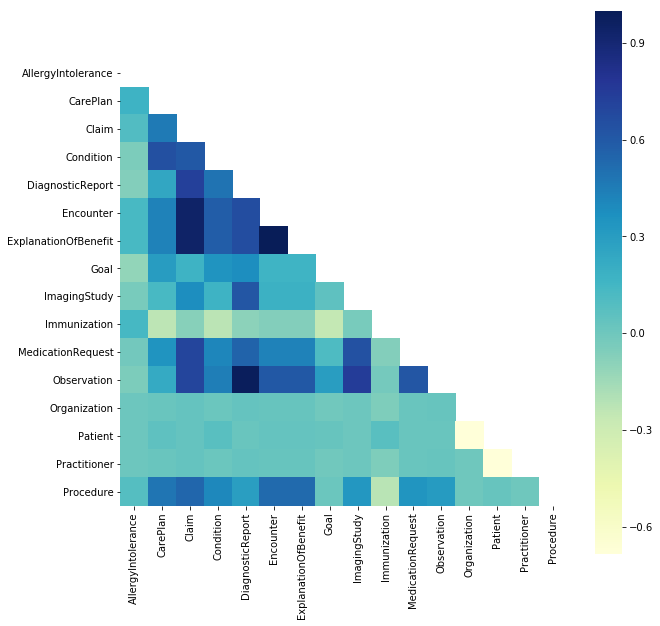

In [206]:
corr = df.corr()

# In order to remove duplicate information,
# use mask to show only other half of the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
colormap = "YlGnBu"

# set figure size
plt.subplots(figsize=(10,10))

ax = sns.heatmap(corr, mask=mask, square=True, cmap=colormap)

* Explain: Encounter, Claim, ExplanationOfBenefit
* Explain: Observation, DiagnosisReport, ImagingStudy

Get bundle with highest number of encounters

In [214]:
sorted_df = df.sort_values("Encounter", axis=0, ascending=False)

In [216]:
sorted_df.index[0]

'Bryon392_Brakus656_83eef197-13fa-4ec3-9ed5-0b1955e81bf4'